In [1]:
import os

In [2]:
os.chdir('../../')

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [167]:
from linear_models import LogisticRegression
from utils.functions.loss import binary_cross_entropy
from utils.functions.activation import Sigmoid
from utils.metrics import accuracy

In [6]:
data=pd.read_csv('./data/iris.csv')
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
def numeric_labels(categorical_labels):
    
    labels=list(set(categorical_labels))
    numeric_labels=[]
    
    for cat_label in categorical_labels:
        if cat_label in labels:
            numeric_labels.append(labels.index(cat_label))
    
    return sorted(numeric_labels)
            

In [8]:
data['labels']=numeric_labels(data['variety'])

In [9]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,labels
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


In [10]:
data=data[data['labels']<2]

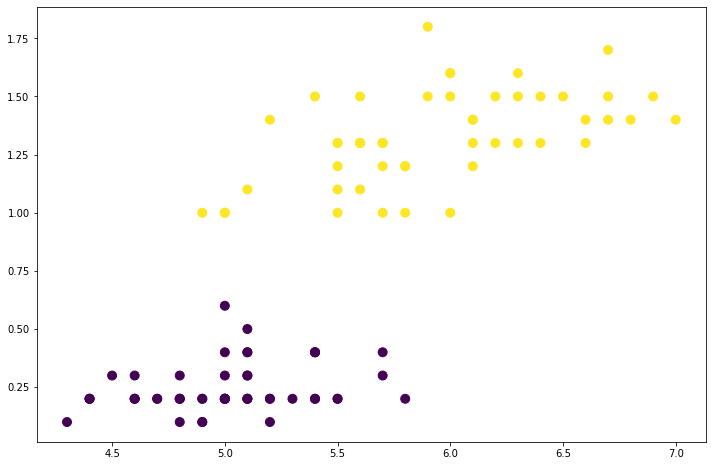

In [42]:
plt.figure(figsize=(12,8))
plt.scatter(data['sepal.length'],data['petal.width'],s=80,c=data['labels'] )

In [43]:
features=data[['sepal.length','petal.width']].to_numpy().T
features

array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
        0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
        0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
        0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
        1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
        1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.

In [44]:
labels=data['labels'].to_numpy()
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [168]:
model=LogisticRegression()

model.optimizers(function_of_activation=Sigmoid, 
                 loss_function=binary_cross_entropy,
                 lr=0.001, 
                 metrics=accuracy)

In [169]:
hist_train=model.train(n_iters=21,
                       features=features,
                       labels=labels, 
                       callbacks_period=3)

Iter:	3	==================================================>	 accuracy:	50.00% 


Iter:	6	==================================================>	 accuracy:	51.00% 


Iter:	9	==================================================>	 accuracy:	96.00% 


Iter:	12	==================================================>	 accuracy:	100.00% 


Iter:	15	==================================================>	 accuracy:	100.00% 


Iter:	18	==================================================>	 accuracy:	100.00% 


Iter:	21	==================================================>	 accuracy:	100.00% 




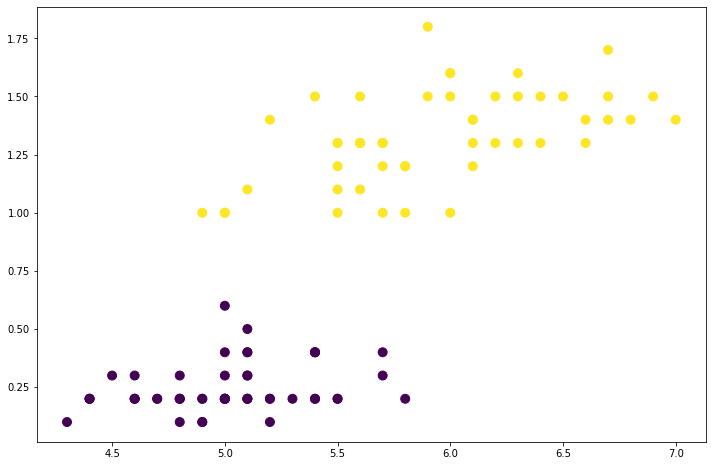

In [170]:
plt.figure(figsize=(12,8))
plt.scatter(data['sepal.length'],data['petal.width'],s=80,c=model.predict(features) )
